# Graphing per-year sentiment

Because of the hefty nature of the previous notebook- we've chosen to separate this part out, for analysis of the sentiments and historical events.

In [90]:
import pandas as pd

# Dataframe containing a randoms sampling of 150 letters per year, annotated with sentiment values.
sentiments = pd.read_csv('per_year_sentiment.csv', usecols=['meta-date', 'meta-href', 'meta-text', 'meta-author', 'meta-lang', 'meta-sentiment']).dropna()
sentiments

,meta-date,meta-href,meta-text,meta-author,meta-lang,meta-sentiment
0,1866-05-31,https://megadigital.bbaw.de/briefe/detail.xql?...,"\n\n | 47, Princess Street,Man...",Ernest (Ernst) Charles Jones,en,"('pos', 0.076)"
1,1866-05-16,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | Mchr 16 Mai 1866.\nLieb...,Friedrich Engels,de,"('neg', 0.8568170070648193)"
2,1866-09-05,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | 5 Sept. 1866.\nMy belov...,Karl Marx,en,"('pos', 0.134)"
3,1866-08-31,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | 18 Bouverie StFriday Af...,William Randall Cremer,en,"('pos', 0.135)"
4,1866-11-12,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | Londres. 12 Nov.\n ...,François Lafargue,fr,"('pos', 0.6401874423027039)"
...,...,...,...,...,...,...
595,1869-04-12,https://megadigital.bbaw.de/briefe/detail.xql?...,"\n\n | 3 Old Hill,\n ...",John Malcolm Forbes Ludlow,en,"('pos', 0.119)"
596,1869-11-13,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | den 13 Nov. 69.\nLieber...,Wilhelm Liebknecht,de,"('neu', 0.711406409740448)"
597,1869-04-24,https://megadigital.bbaw.de/briefe/detail.xql?...,\n\n | London 24 April.\n ...,Friedrich Engels,de,"('neu', 0.8875515460968018)"
598,1869-04-12,https://megadigital.bbaw.de/briefe/detail.xql?...,"\n\n | Berlin, Montag\nLieber ...",Friedrich Engels,de,"('neu', 0.9866553544998169)"


# Looking at the data graphically

Because the data is a bit opaque, we can graph letters by sentiment per year.

In [91]:
from sentiments import SentimentLabel, SentimentValue
import ast

def parse_sentiment(sentiment):
    '''
    Parse sentiments into tuples
    '''
    tag, val = ast.literal_eval(sentiment)
    return tag, val

sentiments['meta-sentiment'] = sentiments.apply(lambda row: parse_sentiment(row['meta-sentiment']), axis=1)

In [92]:
def filter_sentiment(row, lbl):
    return row['meta-sentiment'][0] == lbl

yposs = sentiments[sentiments.apply(lambda row: filter_sentiment(row, 'pos'), axis=1)].sort_values('meta-date', ascending=True)
ynegs = sentiments[sentiments.apply(lambda row: filter_sentiment(row, 'neg'), axis=1)].sort_values('meta-date', ascending=True)
yneus = sentiments[sentiments.apply(lambda row: filter_sentiment(row, 'neu'), axis=1)].sort_values('meta-date', ascending=True)

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = pd.concat([yposs['meta-date'], ynegs['meta-date'], yneus['meta-date']])

snd = lambda x: x[1]

ypos = yposs['meta-sentiment'].map(snd)
yneg = ynegs['meta-sentiment'].map(snd)
yneu = yneus['meta-sentiment'].map(snd)


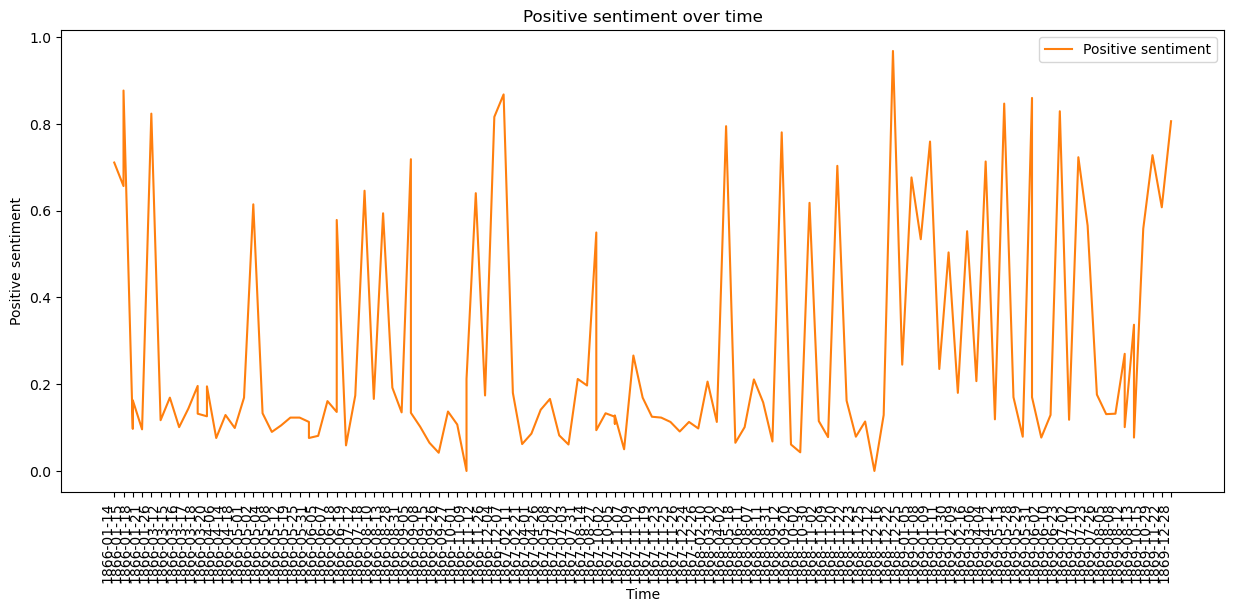

In [94]:
plt.figure(figsize=(15, 6))
plt.plot(yposs['meta-date'], ypos, 'C1', label='Positive sentiment', markersize=20)
plt.ylabel('Positive sentiment')
plt.xlabel('Time')
plt.title('Positive sentiment over time')
plt.xticks(rotation=90, ha='right')
plt.legend()

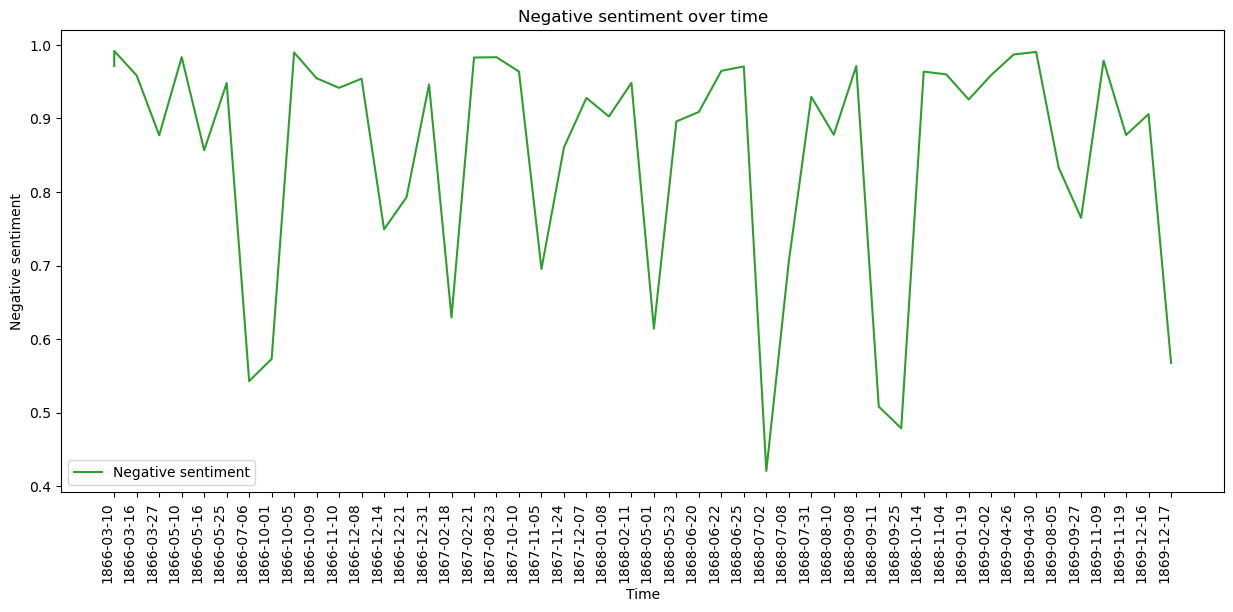

In [95]:
plt.figure(figsize=(15, 6))
plt.plot(ynegs['meta-date'], yneg, 'C2', label='Negative sentiment', markersize=10)
plt.ylabel('Negative sentiment')
plt.xlabel('Time')
plt.title('Negative sentiment over time')
plt.xticks(rotation=90, ha='right')
plt.legend()

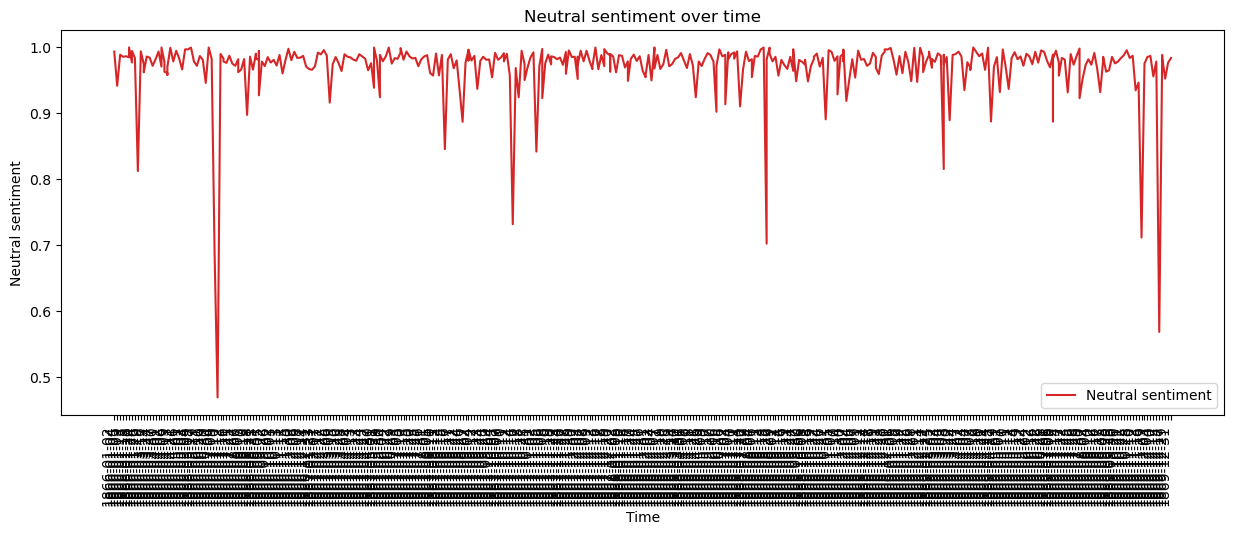

In [96]:
plt.figure(figsize=(15, 5))
plt.plot(yneus['meta-date'], yneu, 'C3', label='Neutral sentiment', markersize=20)
plt.ylabel('Neutral sentiment')
plt.xlabel('Time')
plt.title('Neutral sentiment over time')
plt.xticks(rotation=90, ha='right')
plt.legend()

## Graphing the frequency of sentiments over time
 
It seems that largely the letters were *very neutral* in their contents, but to support this actually, we can do some more analysis of the data.

In [97]:
sentiments['meta-date'] = pd.to_datetime(sentiments['meta-date'])
years = set(sentiments['meta-date'].map(lambda date: date.year))
years

{1866, 1867, 1868, 1869}

In [98]:
freq_dates = dict()

for year in years:
    dfs = sentiments[sentiments.apply(lambda row: row['meta-date'].year == year, axis=1)]
    poss = len(dfs[dfs.apply(lambda row: row['meta-sentiment'][0] == 'pos', axis=1)])
    negs = len(dfs[dfs.apply(lambda row: row['meta-sentiment'][0] == 'neg', axis=1)])
    neus = len(dfs[dfs.apply(lambda row: row['meta-sentiment'][0] == 'neu', axis=1)])
    if year in freq_dates:
        freq_dates[year]['pos'] += poss
        freq_dates[year]['neg'] += negs
        freq_dates[year]['neu'] += neus
    else:
        freq_dates[year] = dict()
        freq_dates[year]['pos'] = poss
        freq_dates[year]['neg'] = negs
        freq_dates[year]['neu'] = neus

freq_dates

{1866: {'pos': 51, 'neg': 16, 'neu': 82},
 1867: {'pos': 24, 'neg': 7, 'neu': 119},
 1868: {'pos': 22, 'neg': 16, 'neu': 112},
 1869: {'pos': 32, 'neg': 10, 'neu': 108}}

Text(0.5, 1.0, 'Letter sentiment frequency over time')

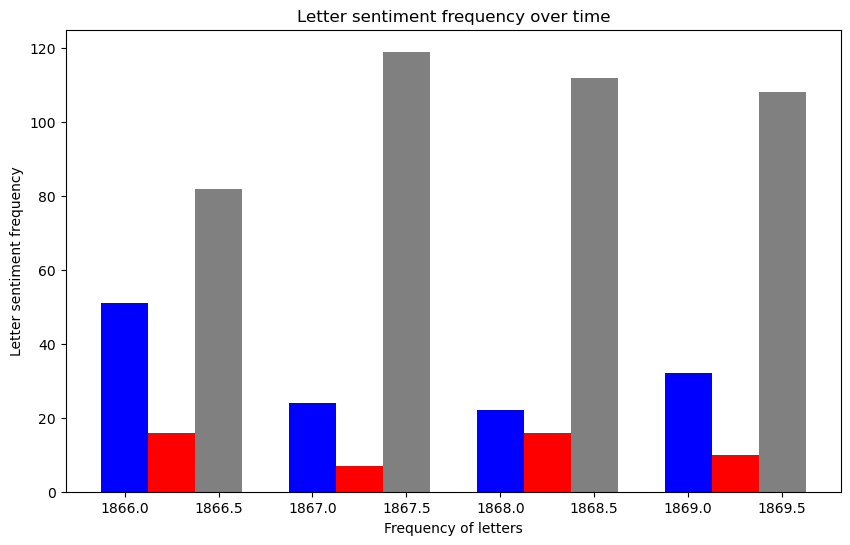

In [99]:
bar_width = 0.25
plt.figure(figsize=(10, 6))

for date, freqs in freq_dates.items():
    pos = freqs['pos']
    neg = freqs['neg']
    neu = freqs['neu']
    plt.bar(date, pos, color='BLUE', label='Positive letters', width=bar_width)
    plt.bar(date + bar_width, neg, color='RED', label='Negative letters', width=bar_width)
    plt.bar(date + (2 * bar_width), neu, color='GREY', label='Neutral letters', width=bar_width)

plt.xlabel('Frequency of letters')
plt.ylabel('Letter sentiment frequency')
plt.title('Letter sentiment frequency over time')

# Collating Events

In [100]:
from copy import deepcopy
events = deepcopy(sentiments[['meta-date', 'meta-sentiment', 'meta-author']])

ts = lambda x: pd.Timestamp(x)

panic_date          = ts('1866-05-12')
capital_date        = ts('1867-08-15')
reform_date         = ts('1867-09-15')
presidential_date   = ts('1868-11-04')
belgian_date        = ts('1869-05-12')

special_dates = [panic_date, capital_date, reform_date, presidential_date, belgian_date]

def add_datetime(date, n):
    return date + pd.DateOffset(n=n)

range_of_dates = []
for date in special_dates:
    for i in range(-10, 11):
        range_of_dates.append(add_datetime(date, i))
special_dates += range_of_dates
special_dates

def is_special_date(date):
    return any(date == special_date for special_date in special_dates)

special_dates

[Timestamp('1866-05-12 00:00:00'),
 Timestamp('1867-08-15 00:00:00'),
 Timestamp('1867-09-15 00:00:00'),
 Timestamp('1868-11-04 00:00:00'),
 Timestamp('1869-05-12 00:00:00'),
 Timestamp('1866-05-02 00:00:00'),
 Timestamp('1866-05-03 00:00:00'),
 Timestamp('1866-05-04 00:00:00'),
 Timestamp('1866-05-05 00:00:00'),
 Timestamp('1866-05-06 00:00:00'),
 Timestamp('1866-05-07 00:00:00'),
 Timestamp('1866-05-08 00:00:00'),
 Timestamp('1866-05-09 00:00:00'),
 Timestamp('1866-05-10 00:00:00'),
 Timestamp('1866-05-11 00:00:00'),
 Timestamp('1866-05-12 00:00:00'),
 Timestamp('1866-05-13 00:00:00'),
 Timestamp('1866-05-14 00:00:00'),
 Timestamp('1866-05-15 00:00:00'),
 Timestamp('1866-05-16 00:00:00'),
 Timestamp('1866-05-17 00:00:00'),
 Timestamp('1866-05-18 00:00:00'),
 Timestamp('1866-05-19 00:00:00'),
 Timestamp('1866-05-20 00:00:00'),
 Timestamp('1866-05-21 00:00:00'),
 Timestamp('1866-05-22 00:00:00'),
 Timestamp('1867-08-05 00:00:00'),
 Timestamp('1867-08-06 00:00:00'),
 Timestamp('1867-08-

In [101]:
events[events['meta-date'] == panic_date]
events[events['meta-date'] == capital_date]
events[events['meta-date'] == reform_date]
events[events['meta-date'] == presidential_date]
events[events['meta-date'] == belgian_date]

,meta-date,meta-sentiment,meta-author
458,1869-05-12,"(neu, 0.9928419589996338)",Karl Marx


In [102]:
events['meta-event'] = events.apply(lambda row: is_special_date(row['meta-date']), axis=1)

In [103]:
events['meta_label'] = events.apply(lambda row: row['meta-sentiment'][0], axis=1)
events['meta_value'] = events.apply(lambda row: row['meta-sentiment'][1], axis=1)
events['meta_sentiment'] = events['meta-sentiment']
events['meta_date'] = events['meta-date']
events['meta_event'] = events.apply(lambda row: int(row['meta-event']), axis=1)
events['meta_author'] = events['meta-author']
events

,meta-date,meta-sentiment,meta-author,meta-event,meta_label,meta_value,meta_sentiment,meta_date,meta_event,meta_author
0,1866-05-31,"(pos, 0.076)",Ernest (Ernst) Charles Jones,False,pos,0.076000,"(pos, 0.076)",1866-05-31,0,Ernest (Ernst) Charles Jones
1,1866-05-16,"(neg, 0.8568170070648193)",Friedrich Engels,True,neg,0.856817,"(neg, 0.8568170070648193)",1866-05-16,1,Friedrich Engels
2,1866-09-05,"(pos, 0.134)",Karl Marx,False,pos,0.134000,"(pos, 0.134)",1866-09-05,0,Karl Marx
3,1866-08-31,"(pos, 0.135)",William Randall Cremer,False,pos,0.135000,"(pos, 0.135)",1866-08-31,0,William Randall Cremer
4,1866-11-12,"(pos, 0.6401874423027039)",François Lafargue,False,pos,0.640187,"(pos, 0.6401874423027039)",1866-11-12,0,François Lafargue
...,...,...,...,...,...,...,...,...,...,...
595,1869-04-12,"(pos, 0.119)",John Malcolm Forbes Ludlow,False,pos,0.119000,"(pos, 0.119)",1869-04-12,0,John Malcolm Forbes Ludlow
596,1869-11-13,"(neu, 0.711406409740448)",Wilhelm Liebknecht,False,neu,0.711406,"(neu, 0.711406409740448)",1869-11-13,0,Wilhelm Liebknecht
597,1869-04-24,"(neu, 0.8875515460968018)",Friedrich Engels,False,neu,0.887552,"(neu, 0.8875515460968018)",1869-04-24,0,Friedrich Engels
598,1869-04-12,"(neu, 0.9866553544998169)",Friedrich Engels,False,neu,0.986655,"(neu, 0.9866553544998169)",1869-04-12,0,Friedrich Engels


In [104]:
import statsmodels.formula.api as smf

smf.logit('meta_event ~ meta_value + meta_label', data=events).fit().summary()

Optimization terminated successfully.
         Current function value: 0.298489
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             meta_event   No. Observations:                  599
Model:                          Logit   Df Residuals:                      595
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                0.001738
Time:                        10:46:08   Log-Likelihood:                -178.79
converged:                       True   LL-Null:                       -179.11
Covariance Type:            nonrobust   LLR p-value:                    0.8912
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9343      1.062     -2.763      0.006      -5.016      -0.853
meta_label[T.neu]     0.0726      0.560      0.130      0.897      -1.024       1.170
meta_label[T.pos]     0.2820      0.854      0.330      0.741      -1.393       1.957
meta_value            0.5970      1.067      0.559      0.576      -1.495       2.689
=====================================================================================
"""

In [105]:
smf.logit('meta_event ~ meta_value', data=events).fit().summary()

Optimization terminated successfully.
         Current function value: 0.298579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             meta_event   No. Observations:                  599
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                0.001436
Time:                        10:46:08   Log-Likelihood:                -178.85
converged:                       True   LL-Null:                       -179.11
Covariance Type:            nonrobust   LLR p-value:                    0.4733
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6181      0.440     -5.951      0.000      -3.480      -1.756
meta_value     0.3464      0.496      0.698      0.485      -0.626       1.319
==============================================================================
"""

In [106]:
smf.logit('meta_event ~ meta_label', data=events).fit().summary()

Optimization terminated successfully.
         Current function value: 0.298743
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             meta_event   No. Observations:                  599
Model:                          Logit   Df Residuals:                      596
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:               0.0008875
Time:                        10:46:08   Log-Likelihood:                -178.95
converged:                       True   LL-Null:                       -179.11
Covariance Type:            nonrobust   LLR p-value:                    0.8530
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4204      0.522     -4.639      0.000      -3.443      -1.398
meta_label[T.neu]     0.1385      0.548      0.253      0.801      -0.936       1.213
meta_label[T.pos]    -0.0562      0.617     -0.091      0.927      -1.265       1.153
=====================================================================================
"""

In [107]:
smf.ols('meta_event ~ meta_author', data=events).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_event   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.340
Date:                Mon, 04 Dec 2023   Prob (F-statistic):             0.0537
Time:                        10:46:11   Log-Likelihood:                -55.634
No. Observations:                 599   AIC:                             229.3
Df Residuals:                     540   BIC:                             488.6
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      3.676e-14      0.280   1.31e-13      1.000      -0.549       0.549
meta_author[T.Adolph N. Davisson]                                                 0.3333      0.323      1.032      0.302      -0.301       0.968
meta_author[T.Albert F. Haufe]                                                    1.0000      0.395      2.529      0.012       0.223       1.777
meta_author[T.Arthur Brookes]                                                 -3.766e-14      0.395  -9.52e-14      1.000      -0.777       0.777
meta_author[T.August Bebel]                                                   -3.715e-14      0.323  -1.15e-13      1.000      -0.634       0.634
meta_author[T.Carl Wilhelm Klein]                                             -3.689e-14      0.343  -1.08e-13      1.000      -0.673       0.673
meta_author[T.Charles Durham]                                                 -3.804e-14      0.395  -9.62e-14      1.000      -0.777       0.777
meta_author[T.Charles Keller]                                                 -3.736e-14      0.395  -9.45e-14      1.000      -0.777       0.777
meta_author[T.Collet Dobson Collet]                                               0.1818      0.292      0.622      0.534      -0.392       0.756
meta_author[T.César De Paepe]                                                 -3.734e-14      0.343  -1.09e-13      1.000      -0.673       0.673
meta_author[T.Edith Blanche André]                                            -3.334e-14      0.395  -8.43e-14      1.000      -0.777       0.777
meta_author[T.Edmond Beales]                                                  -3.526e-14      0.395  -8.92e-14      1.000      -0.777       0.777
meta_author[T.Emil Engels]                                                    -3.987e-14      0.395  -1.01e-13      1.000      -0.777       0.777
meta_author[T.Ernest (Ernst) Charles Jones]                                       0.6667      0.323      2.065      0.039       0.032       1.301
meta_author[T.Ernst Dronke]                                                   -3.603e-14      0.395  -9.11e-14      1.000      -0.777       0.777
meta_author[T.Eugène Dupont]                                                   -3.75e-14      0.306  -1.22e-13      1.000      -0.602       0.602
meta_author[T.Ferdinand Freiligrath]                                           -3.41e-14      0.395  -8.62e-14      1.000      -0.777       0.777
meta_author[T.Franzisca Kugelmann]                                            -3.531e-14      0.323  -1.09e-13      1.000      -0.634       0.634
meta_author[T.Fra

In [108]:
smf.logit('meta_event ~ meta_label + meta_author', data=events).fit().summary()

         Current function value: 0.254984
         Iterations: 35


/Users/connorhanley/anaconda3/envs/lingstats/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             meta_event   No. Observations:                  599
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           60
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1472
Time:                        10:46:35   Log-Likelihood:                -152.74
converged:                      False   LL-Null:                       -179.11
Covariance Type:            nonrobust   LLR p-value:                    0.7356
=================================================================================================================================================
                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       -23.1537   1.05e+05     -0.000      1.000   -2.05e+05    2.05e+05
meta_label[T.neu]                                                                 0.0339      0.565      0.060      0.952      -1.073       1.141
meta_label[T.pos]                                                                -0.8066      0.839     -0.961      0.337      -2.452       0.839
meta_author[T.Adolph N. Davisson]                                                22.4266   1.05e+05      0.000      1.000   -2.05e+05    2.05e+05
meta_author[T.Albert F. Haufe]                                                   40.7923   1.05e+05      0.000      1.000   -2.06e+05    2.06e+05
meta_author[T.Arthur Brookes]                                                     2.0601   1.19e+05   1.73e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.August Bebel]                                                       0.2714   1.17e+05   2.31e-06      1.000    -2.3e+05     2.3e+05
meta_author[T.Carl Wilhelm Klein]                                                -1.9934   2.26e+05   -8.8e-06      1.000   -4.44e+05    4.44e+05
meta_author[T.Charles Durham]                                                     2.0601   1.19e+05   1.73e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Charles Keller]                                                     2.0601   1.19e+05   1.73e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Collet Dobson Collet]                                              22.4563   1.05e+05      0.000      1.000   -2.05e+05    2.05e+05
meta_author[T.César De Paepe]                                                    -1.1528   2.26e+05  -5.09e-06      1.000   -4.44e+05    4.44e+05
meta_author[T.Edith Blanche André]                                                2.0601   1.19e+05   1.73e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Edmond Beales]                                                      2.0601   1.19e+05   1.73e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Emil Engels]                                                        1.2195   1.19e+05   1.02e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Ernest (Ernst) Charles Jones]                                      24.4018   1.05e+05      0.000      1.000   -2.05e+05    2.05e+05
meta_author[T.Ernst Dronke]                                                       1.2195   1.19e+05   1.02e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Eugène Dupont]                                                    -14.1585   8.47e+07  -1.67e-07      1.000   -1.66e+08    1.66e+08
meta_author[T.Ferdinand Freiligrath]                                              1.2195   1.19e+05   1.02e-05      1.000   -2.34e+05    2.34e+05
meta_author[T.Franzisca Kugel

# Re-analyzing Sentiment Analysis

Because of the terrible results above, I'm going to separate out about 3/4's of the training set for training itself, and then retain 1/4 for testing the set to see if there is in fact some kind of bias or overfitting occurring.# Re-analyzing Sentiment Analysis

In [109]:
len(events)

x = 149 * 3
print(x)
print(599 - x)

447
152


In [110]:
training = deepcopy(events[:447])
eval = deepcopy(events[447:])

In [111]:
label = smf.logit('meta_event ~ meta_label', data=training).fit()

Optimization terminated successfully.
         Current function value: 0.321574
         Iterations 6


In [112]:
prediction = label.predict(eval)

In [113]:
eval['meta_label_prediction'] = prediction
eval[eval['meta_event'] == 1]

,meta-date,meta-sentiment,meta-author,meta-event,meta_label,meta_value,meta_sentiment,meta_date,meta_event,meta_author,meta_label_prediction
458,1869-05-12,"(neu, 0.9928419589996338)",Karl Marx,True,neu,0.992842,"(neu, 0.9928419589996338)",1869-05-12,1,Karl Marx,0.099678
472,1869-05-22,"(neu, 0.9903810620307922)",Friedrich Engels,True,neu,0.990381,"(neu, 0.9903810620307922)",1869-05-22,1,Friedrich Engels,0.099678
488,1869-05-13,"(neu, 0.9821841716766357)",Friedrich Engels,True,neu,0.982184,"(neu, 0.9821841716766357)",1869-05-13,1,Friedrich Engels,0.099678
517,1869-05-14,"(neu, 0.9863733053207397)",Friedrich Engels,True,neu,0.986373,"(neu, 0.9863733053207397)",1869-05-14,1,Friedrich Engels,0.099678
525,1869-05-19,"(neu, 0.9722423553466797)",Friedrich Engels,True,neu,0.972242,"(neu, 0.9722423553466797)",1869-05-19,1,Friedrich Engels,0.099678
529,1869-05-07,"(neu, 0.9696444869041443)",Friedrich Engels,True,neu,0.969644,"(neu, 0.9696444869041443)",1869-05-07,1,Friedrich Engels,0.099678
565,1869-05-13,"(pos, 0.8466183543205261)",Édouard Glaser de Willebrord,True,pos,0.846618,"(pos, 0.8466183543205261)",1869-05-13,1,Édouard Glaser de Willebrord,0.092784
582,1869-05-10,"(neu, 0.9370306730270386)",Friedrich Engels,True,neu,0.937031,"(neu, 0.9370306730270386)",1869-05-10,1,Friedrich Engels,0.099678
585,1869-05-11,"(neu, 0.984064519405365)",Louis Kugelmann,True,neu,0.984065,"(neu, 0.984064519405365)",1869-05-11,1,Louis Kugelmann,0.099678


In [114]:
value = smf.logit('meta_event ~ meta_value', data=training).fit()
prediction = value.predict(eval)
eval['meta_value_prediction'] = prediction

Optimization terminated successfully.
         Current function value: 0.321518
         Iterations 6


In [115]:
eval[eval['meta_event'] == 1]

,meta-date,meta-sentiment,meta-author,meta-event,meta_label,meta_value,meta_sentiment,meta_date,meta_event,meta_author,meta_label_prediction,meta_value_prediction
458,1869-05-12,"(neu, 0.9928419589996338)",Karl Marx,True,neu,0.992842,"(neu, 0.9928419589996338)",1869-05-12,1,Karl Marx,0.099678,0.101031
472,1869-05-22,"(neu, 0.9903810620307922)",Friedrich Engels,True,neu,0.990381,"(neu, 0.9903810620307922)",1869-05-22,1,Friedrich Engels,0.099678,0.100996
488,1869-05-13,"(neu, 0.9821841716766357)",Friedrich Engels,True,neu,0.982184,"(neu, 0.9821841716766357)",1869-05-13,1,Friedrich Engels,0.099678,0.100880
517,1869-05-14,"(neu, 0.9863733053207397)",Friedrich Engels,True,neu,0.986373,"(neu, 0.9863733053207397)",1869-05-14,1,Friedrich Engels,0.099678,0.100939
525,1869-05-19,"(neu, 0.9722423553466797)",Friedrich Engels,True,neu,0.972242,"(neu, 0.9722423553466797)",1869-05-19,1,Friedrich Engels,0.099678,0.100739
529,1869-05-07,"(neu, 0.9696444869041443)",Friedrich Engels,True,neu,0.969644,"(neu, 0.9696444869041443)",1869-05-07,1,Friedrich Engels,0.099678,0.100703
565,1869-05-13,"(pos, 0.8466183543205261)",Édouard Glaser de Willebrord,True,pos,0.846618,"(pos, 0.8466183543205261)",1869-05-13,1,Édouard Glaser de Willebrord,0.092784,0.098978
582,1869-05-10,"(neu, 0.9370306730270386)",Friedrich Engels,True,neu,0.937031,"(neu, 0.9370306730270386)",1869-05-10,1,Friedrich Engels,0.099678,0.100243
585,1869-05-11,"(neu, 0.984064519405365)",Louis Kugelmann,True,neu,0.984065,"(neu, 0.984064519405365)",1869-05-11,1,Louis Kugelmann,0.099678,0.100907
